<h3>Import Libraries</h3>


In [ ]:
# Importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy 
import scipy.stats as ss
import matplotlib.ticker as ticker

<h3>Reading Dataset</h3>

In [ ]:
# Reading Given Dataset "ch00_B0833-45_20150612_191438_011_1.txt"
df = pd.read_csv('/content/ch00_B0833-45_20150612_191438_011_1.txt', delim_whitespace=True, header=None,names=["North_A", "South_A"])

volt=df.copy(deep=False) #Creating copy of given dataset
rows = volt.shape[0]
cols = volt.shape[1]
#print(volt.head(5))
volt.describe()

,North_A,South_A
count,3.299994e+07,3.299994e+07
mean,3.484731e+00,7.750941e-01
std,2.803035e+01,2.991954e+01
min,-1.280000e+02,-1.280000e+02
25%,-1.600000e+01,-2.000000e+01
50%,4.000000e+00,1.000000e+00
75%,2.300000e+01,2.100000e+01
max,1.270000e+02,1.270000e+02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32999936 entries, 0 to 32999935
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   North_A  int64
 1   South_A  int64
dtypes: int64(2)
memory usage: 503.5 MB


<h3>Section 1: The voltage time series</h3>

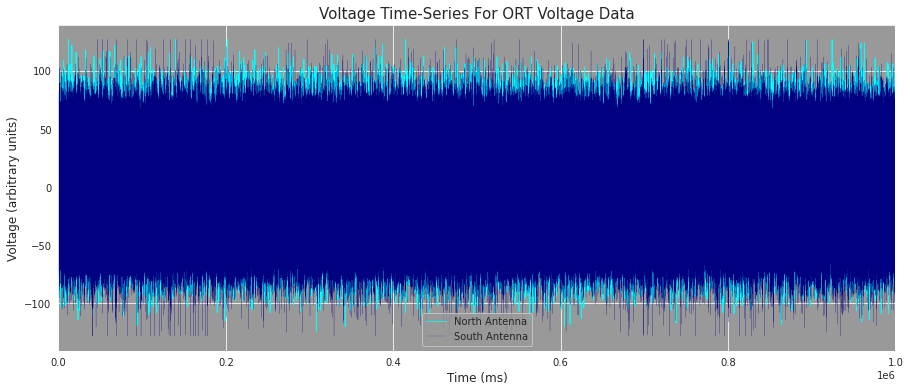

In [ ]:
# (1.1) The voltage time series
sns.set_style("darkgrid", {"axes.facecolor": ".6"})
plt.figure(figsize=(15,6))
plt.plot(volt["North_A"], color='cyan', label='North Antenna',linewidth=0.81)
plt.plot(volt["South_A"], color='navy', label='South Antenna',linewidth=0.15)
plt.ylabel("Voltage (arbitrary units)",fontsize=12)
plt.xlabel("Time (ms)",fontsize=12)
plt.title("Voltage Time-Series For ORT Voltage Data",fontsize=15)
plt.xlim(0, 1e6)
plt.legend(loc='best')
plt.show()



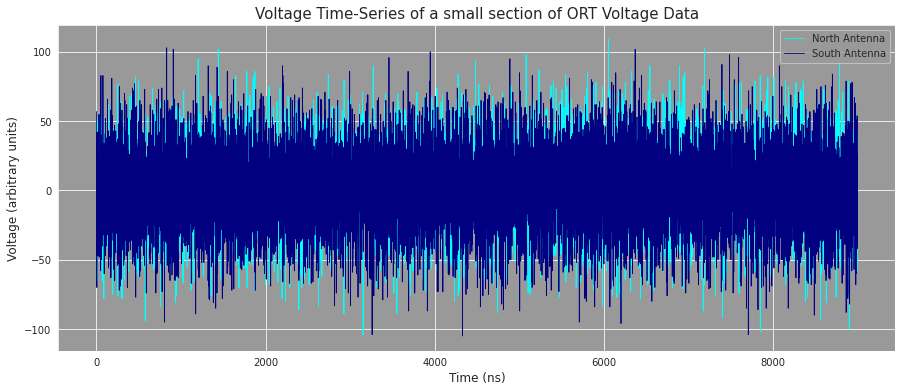

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(volt["North_A"].head(9000), color='cyan', label='North Antenna',linewidth=0.81)
plt.plot(volt["South_A"].head(9000), color='navy', label='South Antenna',linewidth=0.81)
plt.ylabel("Voltage (arbitrary units)",fontsize=12)
plt.xlabel("Time (ns)",fontsize=12)
plt.title("Voltage Time-Series of a small section of ORT Voltage Data",fontsize=15)
plt.legend(loc='best')
plt.show()

In [ ]:
"""
# (1.2) Plot the voltage histograms for the two antennas
#--------------------PDF: Using In-Built Function--------------------------
sns.set_style("darkgrid",{"axes.facecolor": ".81"})
plt.figure(figsize=(15,6))
volt["North_A"].plot(kind='hist', density=True, bins=30, color='cyan', edgecolor='dimgrey', alpha=0.6)
sns.kdeplot(volt["North_A"],bw_adjust=7, cut=0)
plt.ylabel("Probablity Distribution",fontsize=15)
plt.xlabel("Voltage (North Antenna)",fontsize=15)
plt.title("Gaussian Distribution for Voltages (North Antenna)",fontsize=21)
plt.show()
"""

'\n# (1.2) Plot the voltage histograms for the two antennas\n#--------------------PDF: Using In-Built Function--------------------------\nsns.set_style("darkgrid",{"axes.facecolor": ".81"})\nplt.figure(figsize=(15,6))\nvolt["North_A"].plot(kind=\'hist\', density=True, bins=30, color=\'cyan\', edgecolor=\'dimgrey\', alpha=0.6)\nsns.kdeplot(volt["North_A"],bw_adjust=7, cut=0)\nplt.ylabel("Probablity Distribution",fontsize=15)\nplt.xlabel("Voltage (North Antenna)",fontsize=15)\nplt.title("Gaussian Distribution for Voltages (North Antenna)",fontsize=21)\nplt.show()\n'

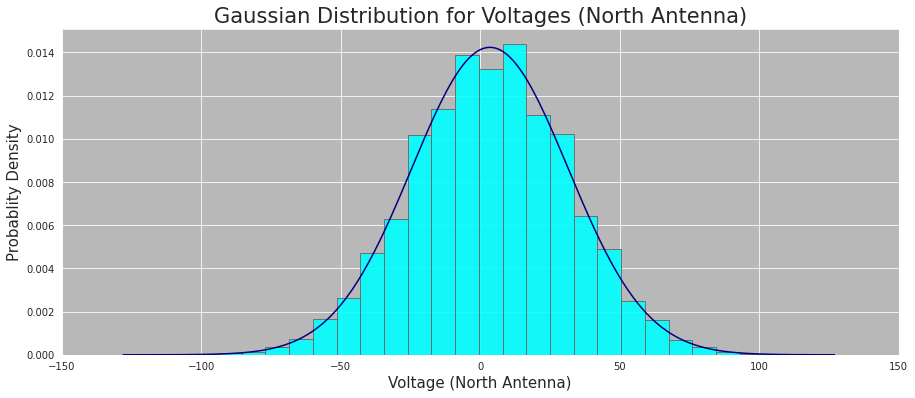

In [ ]:
# (1.2) Plot the voltage histograms for the two antennas
#--------------------PDF: Using Gaussian Probability Distribution for Noise Voltage--------------------------

#-------For North Antenna---------------------------
sns.set_style("darkgrid",{"axes.facecolor": ".72"})

def normal_dist(x , mean , sd): # Function for Probability Density Function
    prob_density = (1/(math.sqrt(2*np.pi)*sd)) * (np.exp(-pow(x-mean,2)/(2*pow(sd,2))))
    return prob_density

# Mean and Standard Deviation 
mean=np.mean(volt["North_A"])
std=np.std(volt["North_A"])

# Apply function to the data
PDF = normal_dist(volt["North_A"],mean,std)

# Adding PDF as new column to copy dataset 'volt'
volt["PDF"]=pd.DataFrame(PDF)
#print(volt.head(4))

# Plot Gaussian Distribution
plt.figure(figsize=(15,6))
volt["North_A"].plot(kind='hist', bins=30, density=True, color='cyan', edgecolor='dimgrey', alpha=0.9)
plt.plot(np.sort(volt["North_A"]),volt['PDF'][np.argsort(volt["North_A"])],color = 'navy', label="Pobability Density Function")
plt.xlim(-150, 150)
plt.ylabel("Probablity Density",fontsize=15)
plt.xlabel("Voltage (North Antenna)",fontsize=15)
plt.title("Gaussian Distribution for Voltages (North Antenna)",fontsize=21)
plt.show()

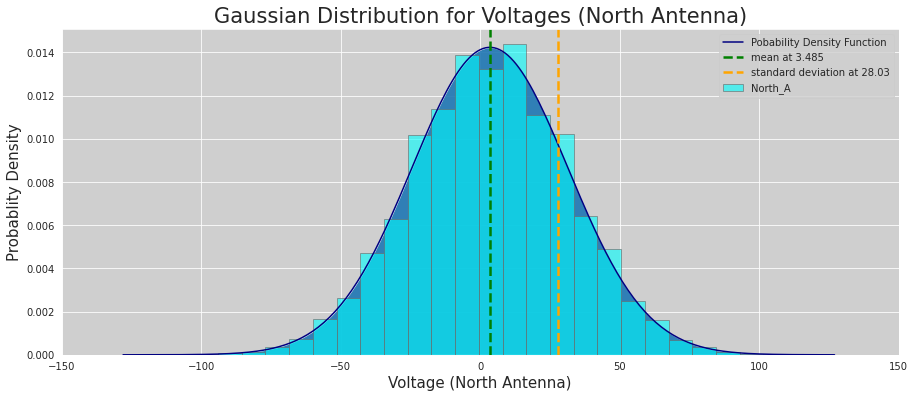

In [ ]:
# Gaussian Distribution Plot for Voltages (North Antenna) with annotation of mean and std in graph
sns.set_style("darkgrid",{"axes.facecolor": ".81"})
plt.figure(figsize=(15,6))
volt["North_A"].plot(kind='hist', bins=30, density=True, color='cyan', edgecolor='dimgrey', alpha=0.6)
plt.plot(np.sort(volt["North_A"]),volt['PDF'][np.argsort(volt["North_A"])],color = 'navy', label="Pobability Density Function")
plt.xlim(-150, 150)
plt.fill_between(np.sort(volt["North_A"]),volt['PDF'][np.argsort(volt["North_A"])], alpha=0.9)
plt.ylabel("Probablity Density",fontsize=15)
plt.xlabel("Voltage (North Antenna)",fontsize=15)
plt.title("Gaussian Distribution for Voltages (North Antenna)",fontsize=21)

measurements = [round(volt["North_A"].mean(),3),round(volt["North_A"].std(),3)]
names = ["mean", "standard deviation"]
colors = ['green', 'orange']

for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
    #axvline() function of matplotlib library is used to add a vertical line across the axes of the plot. Add a vertical line across the axes.
plt.legend()
plt.show()

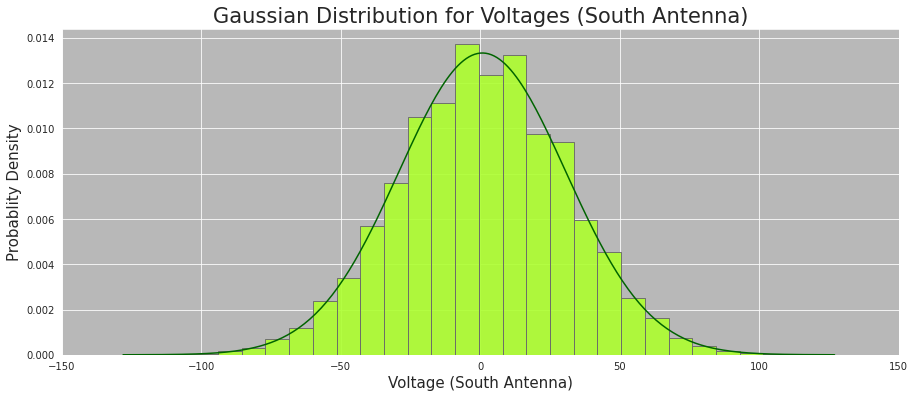

In [ ]:
#---------For South Antenna---------------------------
sns.set_style("darkgrid",{"axes.facecolor": ".72"})

def normal_dist(x , mean , sd): # Function for Probability Density Function
    prob_density = (1/(math.sqrt(2*np.pi)*sd))*(np.exp(-pow(x-mean,2)/(2*pow(sd,2))))
    return prob_density

# Mean and Standard Deviation 
mean=np.mean(volt["South_A"])
std=np.std(volt["South_A"])

#Apply function to the data.
PDF = normal_dist(volt["South_A"],mean,std)

# Adding PDF as new column to copy dataset 'volt'
volt["PDF"]=pd.DataFrame(PDF)
#print(volt.head(4))

#Plot
plt.figure(figsize=(15,6))
volt["South_A"].plot(kind='hist', bins=30, density=True, color='greenyellow', edgecolor='dimgrey', alpha=0.9)
plt.plot(np.sort(volt["South_A"]),volt['PDF'][np.argsort(volt["South_A"])],color = 'darkgreen', label="Pobability Density Function")
plt.xlim(-150, 150)
plt.ylabel("Probablity Density",fontsize=15)
plt.xlabel("Voltage (South Antenna)",fontsize=15)
plt.title("Gaussian Distribution for Voltages (South Antenna)",fontsize=21)
plt.show()

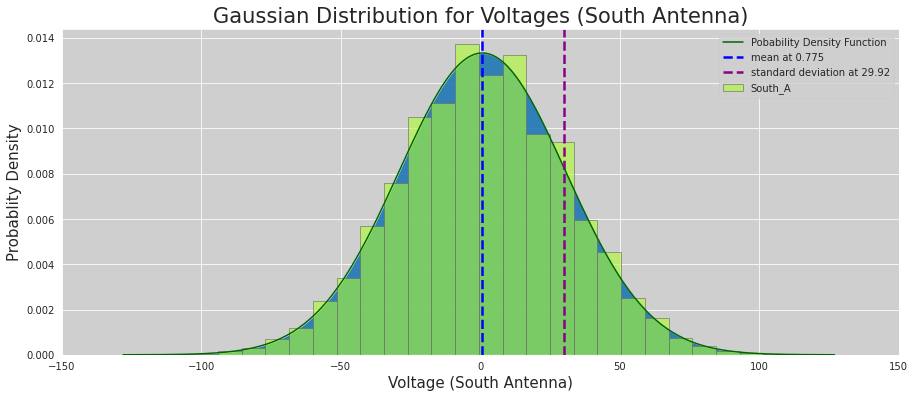

In [ ]:
# Gaussian Distribution Plot for Voltages (South Antenna) with annotation of mean and std in graph
sns.set_style("darkgrid",{"axes.facecolor": ".81"})
plt.figure(figsize=(15,6))
volt["South_A"].plot(kind='hist', bins=30, density=True, color='greenyellow', edgecolor='dimgrey', alpha=0.6)
plt.plot(np.sort(volt["South_A"]),volt['PDF'][np.argsort(volt["South_A"])],color = 'darkgreen', label="Pobability Density Function")
plt.xlim(-150, 150)
plt.fill_between(np.sort(volt["South_A"]),volt['PDF'][np.argsort(volt["South_A"])], alpha=0.9)
plt.ylabel("Probablity Density",fontsize=15)
plt.xlabel("Voltage (South Antenna)",fontsize=15)
plt.title("Gaussian Distribution for Voltages (South Antenna)",fontsize=21)

measurements = [round(volt["South_A"].mean(),3),round(volt["South_A"].std(),3)]
names = ["mean", "standard deviation"]
colors = ['blue', 'darkmagenta']

for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
    #axvline() function of matplotlib library is used to add a vertical line across the axes of the plot. Add a vertical line across the axes.
plt.legend()
plt.show()

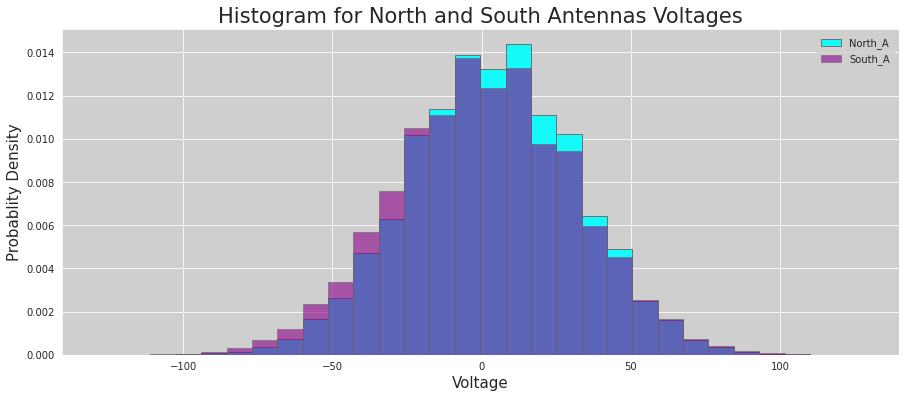

In [ ]:
sns.set_style("darkgrid",{"axes.facecolor": ".81"})
plt.figure(figsize=(15,6))
volt["North_A"].plot(kind='hist', bins=30, density=True, color='cyan', edgecolor='dimgrey', alpha=0.9)
volt["South_A"].plot(kind='hist', bins=30, density=True, color='darkmagenta', edgecolor='dimgrey', alpha=0.6)
plt.ylabel("Probablity Density",fontsize=15)
plt.xlabel("Voltage",fontsize=15)
plt.title("Histogram for North and South Antennas Voltages",fontsize=21)
plt.legend(loc='best')
plt.show()

In [ ]:
# This block is extra not needed now.......
"""
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
volt.boxplot(column=["North_A"],notch ='True',fontsize=12,color={'medians': 'orange'})
plt.yticks(fontsize=12)
plt.title("[ Box plot for price and age ]",fontsize=18)
plt.show()
"""

#------------------------------------------------------------------------------

"""
new_volt=pd.DataFrame()   

#for i in df.columns:
Q1, Q3 = np.nanpercentile(df["North_A"],[25,75])
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR) 
upper_bound = Q3 + (1.5 * IQR)
new_volt["North_A"]=df["North_A"][(df["North_A"]>=lower_bound) & (df["North_A"]<=upper_bound)]

print("\nNumber of records which are noise free: ", end="")
print(new_volt.dropna().shape[0]) 

for i in new_volt.columns:   
  standard=round((new_volt[i]).mean(),2) 
  new_volt[i].fillna(standard,inplace=True)

print("No. of rows in uncleaned and cleaned data respectively: ", volt.shape[0] ,"and",new_volt.shape[0])
#new_volt.info()
"""

'\nnew_volt=pd.DataFrame()   \n\n#for i in df.columns:\nQ1, Q3 = np.nanpercentile(df["North_A"],[25,75])\nIQR = Q3 - Q1\nlower_bound = Q1 - (1.5 * IQR) \nupper_bound = Q3 + (1.5 * IQR)\nnew_volt["North_A"]=df["North_A"][(df["North_A"]>=lower_bound) & (df["North_A"]<=upper_bound)]\n\nprint("\nNumber of records which are noise free: ", end="")\nprint(new_volt.dropna().shape[0]) \n\nfor i in new_volt.columns:   \n  standard=round((new_volt[i]).mean(),2) \n  new_volt[i].fillna(standard,inplace=True)\n\nprint("No. of rows in uncleaned and cleaned data respectively: ", volt.shape[0] ,"and",new_volt.shape[0])\n#new_volt.info()\n'

In [ ]:
"""
df_c=pd.DataFrame(df['North_A'].copy(deep=False)) #Creating copy of given dataset
df_c['Binned']=pd.DataFrame(pd.qcut(df['North_A'], 4))
print("\n\n")
df_c.info()
"""

'\ndf_c=pd.DataFrame(df[\'North_A\'].copy(deep=False)) #Creating copy of given dataset\ndf_c[\'Binned\']=pd.DataFrame(pd.qcut(df[\'North_A\'], 4))\nprint("\n\n")\ndf_c.info()\n'

In [ ]:
t1=rows//4
t2=t1//2

p_n=np.array([])
p1=np.square(df['North_A'][0:t2])
p2=np.square(df['North_A'][t2:t1])
p3=np.square(df['North_A'][t1:])

p_n=np.append(p_n,p1)
p_n=np.append(p_n,p2)
p_n=np.append(p_n,p3)
p_n=p_n.astype('int64')
print(p_n.shape)

(32999936,)


In [ ]:
p_s=np.array([])
p_1=np.square(df['South_A'][0:t2])
p_2=np.square(df['South_A'][t2:t1])
p_3=np.square(df['South_A'][t1:])

p_s=np.append(p_s,p_1)
p_s=np.append(p_s,p_2)
p_s=np.append(p_s,p_3)
p_s=p_s.astype('int64')
print(p_s.shape)

(32999936,)


In [ ]:
power=pd.DataFrame(p_n)
power.rename(columns={0:'North_A'}, inplace=True)
power.insert(1, 'South_A', p_s, True)

power

,North_A,South_A
0,1681,3249
1,784,1521
2,0,121
3,625,1444
4,576,4900
...,...,...
32999931,676,7396
32999932,0,400
32999933,961,1849
32999934,9,9


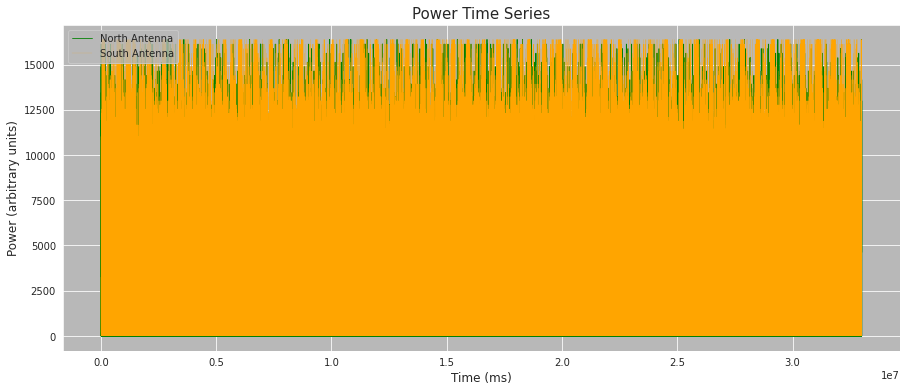

In [ ]:
#--------------------PDF: Using Gaussian Probability Distribution for Noise Voltage--------------------------
sns.set_style("darkgrid", {"axes.facecolor": ".72"})
plt.figure(figsize=(15,6))
plt.plot(power["North_A"], color='green', label='North Antenna',linewidth=0.81)
plt.plot(power["South_A"], color='orange', label='South Antenna',linewidth=0.15)
plt.ylabel("Power (arbitrary units)",fontsize=12)
plt.xlabel("Time (ms)",fontsize=12)
plt.title("Power Time Series",fontsize=15)
plt.legend(loc='best')
plt.show()

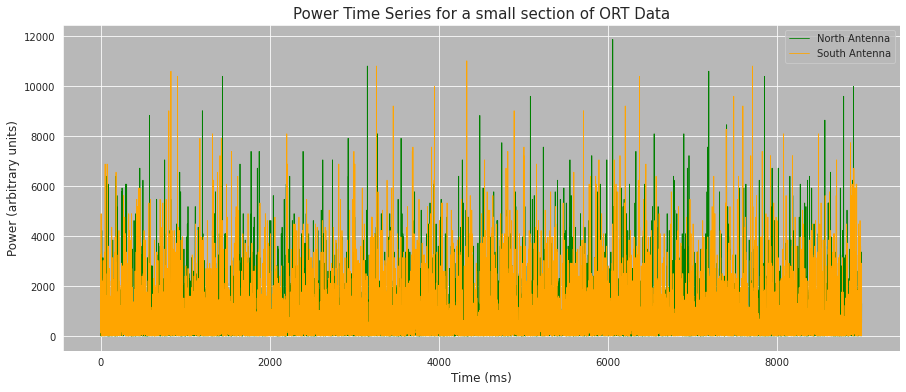

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(power["North_A"].head(9000), color='green', label='North Antenna',linewidth=0.81)
plt.plot(power["South_A"].head(9000), color='orange', label='South Antenna',linewidth=0.81)
plt.ylabel("Power (arbitrary units)",fontsize=12)
plt.xlabel("Time (ms)",fontsize=12)
plt.title("Power Time Series for a small section of ORT Data",fontsize=15)
plt.legend(loc='best')
plt.show()

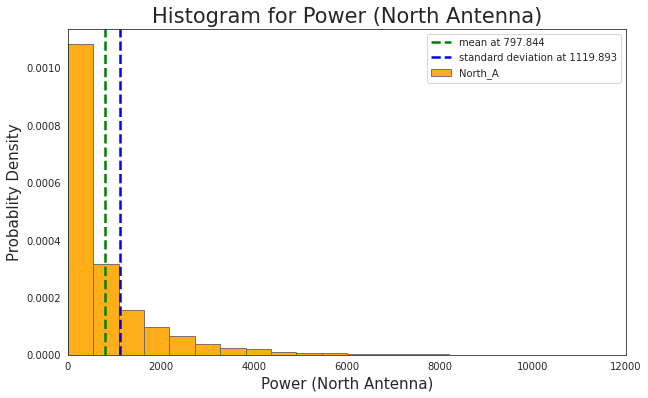

In [ ]:
#--------------------PDF: Using Gaussian Probability Distribution for Noise Voltage--------------------------

plt.figure(figsize=(10,6))
power["North_A"].plot(kind='hist', bins=30, density=True, color='orange', edgecolor='dimgrey', alpha=0.9)
plt.xlim(0, 12000)
plt.ylabel("Probablity Density",fontsize=15)
plt.xlabel("Power (North Antenna)",fontsize=15)
plt.title("Histogram for Power (North Antenna)",fontsize=21)

# Mean and Standard Deviation 
measurements = [round(power["North_A"].mean(),3),round(power["North_A"].std(),3)]
names = ["mean", "standard deviation"]
colors = ['green', 'blue']

for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
    #axvline() function of matplotlib library is used to add a vertical line across the axes of the plot. Add a vertical line across the axes.
plt.legend()
plt.show()

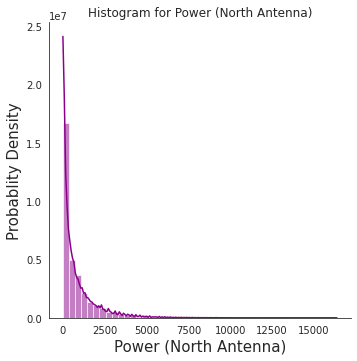

In [ ]:
# Mean and Standard Deviation 
sns.set_style("white")
mean=round(np.mean(power["North_A"]))
std=round(np.std(power["North_A"]))
sns.displot(power['North_A'],bins=45,color='darkmagenta',kde=True)
#plt.text(0.0010, 12000, 'Mean='+str(mean), fontsize = 22)
plt.ylabel("Probablity Density",fontsize=15)
plt.xlabel("Power (North Antenna)",fontsize=15)
plt.title("Histogram for Power (North Antenna)",fontsize=12)
plt.show()

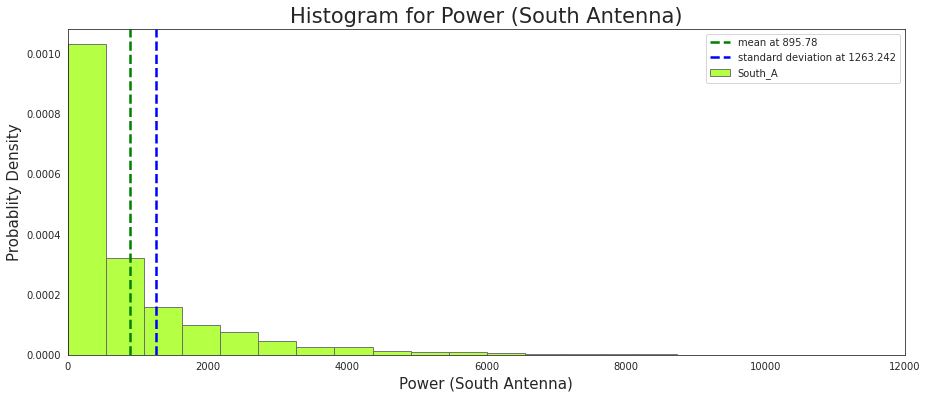

In [ ]:
plt.figure(figsize=(15,6))
power["South_A"].plot(kind='hist', bins=30, density=True, color='greenyellow', edgecolor='dimgrey', alpha=0.9)
plt.xlim(0, 12000)
plt.ylabel("Probablity Density",fontsize=15)
plt.xlabel("Power (South Antenna)",fontsize=15)
plt.title("Histogram for Power (South Antenna)",fontsize=21)

# Mean and Standard Deviation 
measurements = [round(power["South_A"].mean(),3),round(power["South_A"].std(),3)]
names = ["mean", "standard deviation"]
colors = ['green', 'blue']

for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
    #axvline() function of matplotlib library is used to add a vertical line across the axes of the plot. Add a vertical line across the axes.
plt.legend()
plt.show()

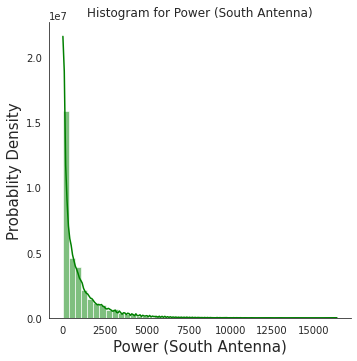

In [ ]:
# Mean and Standard Deviation 
sns.set_style("white")
mean=round(np.mean(power["South_A"]))
std=round(np.std(power["South_A"]))
sns.displot(power['South_A'],bins=45,color='green',kde=True)
plt.ylabel("Probablity Density",fontsize=15)
plt.xlabel("Power (South Antenna)",fontsize=15)
plt.title("Histogram for Power (South Antenna)",fontsize=12)
#plt.text(0.0010, 20000, 'Mean='+str(mean), fontsize = 22)
plt.show()